<a href="https://colab.research.google.com/github/HyeongseokKim/My_codes/blob/main/04_05_XGBoost%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (46.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# XGBoost

- xgboost는 사이킷런에서 제공하지 않기 때문에 별도의 설치과정이 필요하다.
- https://xgboost.readthedocs.io/en/latest/build.html (공식 문서 영문)를 참고하여 설치

- XGBoost는 GBM(Gradient Boosting)의 결정 트리를 구성할 때 병렬 처리를 사용하여, 수행시간을 GBM에 비해 훨씬 단축시켰다.

In [2]:
import xgboost as xgb

model = xgb.XGBClassifier()

### XGboost의 파라미터
- XGboost의 경우에는 파라미터를 3개의 범주로 나눈다. 일반적인 파라미터(General parameters), 부스터 파라미터(Booster parameters), 학습 과정 파라미터(Learning Task parameters)로 구성 되어있다.

#### General parameters
- booster : 어떤 부스터 구조를 쓸 것인지 정하는 파라미터이다. gbtree(결정트리), gblinear(선형모델), dart(Drop out Regression Trees)가 있고 기본값은 'gbtree'이다, gbtree의 성능이 제일 낫다.
- n_jobs : xgboost를 실행시 병렬처리에 사용되는 코어 수, 따로 값을 주지 않으면 자동적으로 코어를 탐지하여 사용.
- num_feature : 특성의 수를 정해줘야 하는 경우에 사용.

#### Booster parameters
- learning_rate : 가중치를 정해주는 파라미터이다.
- gamma : 트리가 분할을 할 때 필요한 최소 손실 감소(Minimum Loss reduction)를 지정해준다, 값이 커지면 트리의 깊이가 줄어들어 보수적인 모델이 된다.
- max_depth : 트리의 깊이를 정해주는 파라미터
- reg_lambda : L2 norm. 값이 커질수록 모델이 보수적으로 변한다.
- reg_alpha : L1 norm. 값이 커질수록 모델이 보수적으로 변한다.

#### Learning Task parameters
- objective : 목적함수를 정해주는 파라미터이다.
    - binary:logistic는 이진분류, multi:softmax는 softmax는 다중 클래스 분류이다. 이 외에도 multi:softprob , rank:map 등 다양한 값들이 존재한다.
- eval_metric : 모델의 평가 함수를 설정하는 파라미터로 회귀분석이면 'rmse', 분류 문제에는 'error'를 기본값으로 사용한다, objective에 따라 기본값이 설정되어 있다.
    - rmse(root mean square error), mae(mean absolute error), error(Binary classification error rate) 등 여러 값들이 존재한다.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [4]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1).fit(X_train, y_train)

In [5]:
xgb_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

- 직접 만든 모델의 파라미터 설정을 확인할 수 있다.
- 유방암 데이터의 y값은 0과 1로 되어있어 objective가 binary:logist로 자동으로 설정되어 있는 것을 볼 수 있다.

In [6]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.992462311557789
test score : 0.9590643274853801


In [7]:
xgb_model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [8]:
xgb_model.predict_proba(X_test)

array([[0.9939806 , 0.00601941],
       [0.6268908 , 0.37310925],
       [0.00464785, 0.99535215],
       [0.9946491 , 0.00535091],
       [0.0048455 , 0.9951545 ],
       [0.00177592, 0.9982241 ],
       [0.99653196, 0.00346806],
       [0.42067719, 0.5793228 ],
       [0.650331  , 0.34966898],
       [0.01664883, 0.9833512 ],
       [0.9929523 , 0.00704772],
       [0.99794257, 0.00205741],
       [0.04021329, 0.9597867 ],
       [0.0882287 , 0.9117713 ],
       [0.99688613, 0.00311385],
       [0.9704341 , 0.02956589],
       [0.87567693, 0.12432305],
       [0.22846425, 0.77153575],
       [0.01248801, 0.987512  ],
       [0.00313467, 0.99686533],
       [0.00638062, 0.9936194 ],
       [0.00317585, 0.99682415],
       [0.7451225 , 0.2548775 ],
       [0.06413919, 0.9358608 ],
       [0.0032382 , 0.9967618 ],
       [0.04148388, 0.9585161 ],
       [0.08371764, 0.91628236],
       [0.04202259, 0.9579774 ],
       [0.00213963, 0.9978604 ],
       [0.00313467, 0.99686533],
       [0.

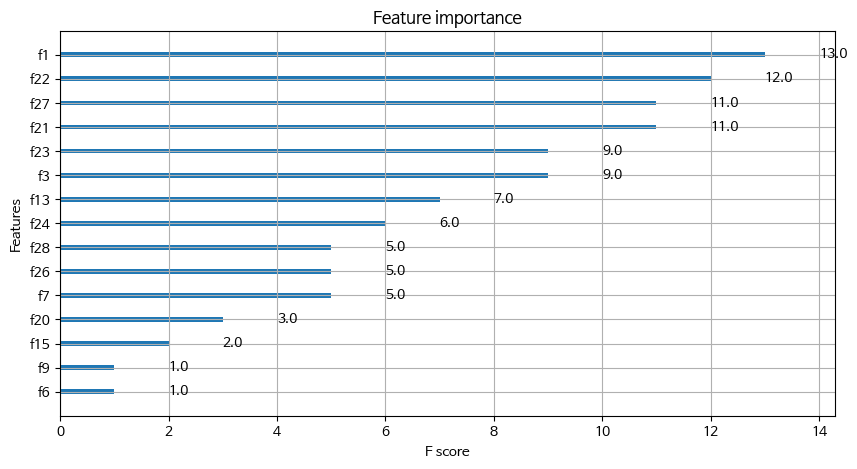

In [9]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- xgboost의 plot_importance로 모델이 어떤 특성에 의존하고 있는지를 확인할 수 있다 또한 직접 만든 데이터의 경우 특성들이 유효한지 확인해 볼 수도 있다.

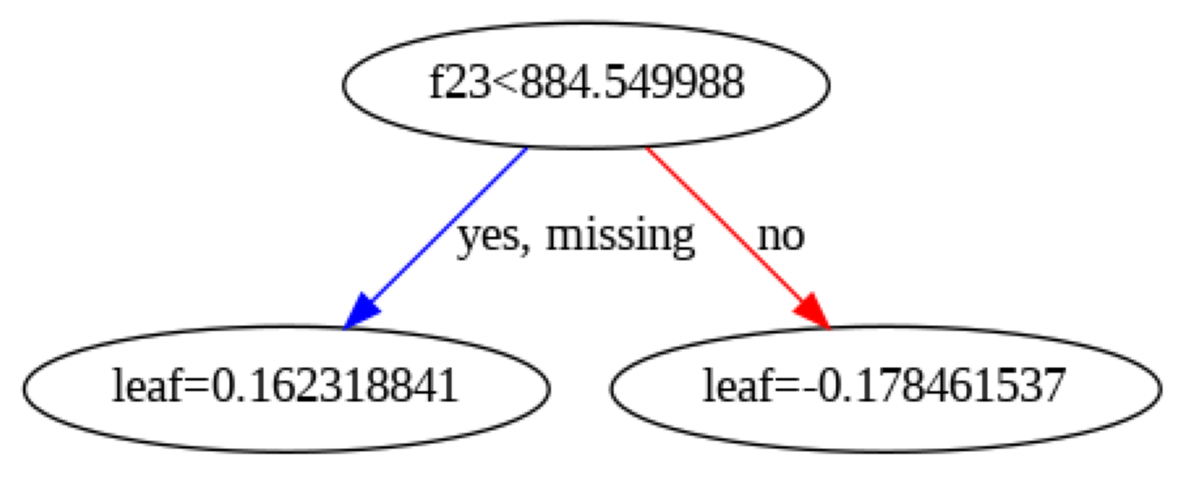

In [10]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(xgb_model, ax = ax)
plt.show()

- plot_tree를 이용해서 트리를 시각화할 수 있다.

In [11]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [12]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1,
                             n_estimators=10).fit(X_train, y_train)

In [13]:
xgb_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

- 유방암 데이터와는 다르게 와인데이터에는 0, 1, 2의 y값을 가진다 따라서 xgboost모델은 자동적으로 objective = 'multi:softprob'으로 되어있는 것을 확인할 수 있다.

In [14]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9838709677419355
test score : 0.9074074074074074


In [15]:
xgb_model.predict(X_test)

array([1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 0, 0, 1])

In [16]:
xgb_model.predict_proba(X_test)

array([[0.19118951, 0.65870875, 0.15010175],
       [0.10470075, 0.45703626, 0.43826294],
       [0.1727131 , 0.18967433, 0.6376126 ],
       [0.6238461 , 0.19737807, 0.1787758 ],
       [0.17219701, 0.18910757, 0.6386954 ],
       [0.5214367 , 0.34932765, 0.12923563],
       [0.19118951, 0.65870875, 0.15010175],
       [0.6572549 , 0.1798476 , 0.16289753],
       [0.1727131 , 0.18967433, 0.6376126 ],
       [0.15723594, 0.68636113, 0.15640296],
       [0.19118951, 0.65870875, 0.15010175],
       [0.19118951, 0.65870875, 0.15010175],
       [0.1727131 , 0.18967433, 0.6376126 ],
       [0.3132502 , 0.44081894, 0.24593087],
       [0.6572549 , 0.1798476 , 0.16289753],
       [0.6238461 , 0.19737807, 0.1787758 ],
       [0.31459382, 0.2047388 , 0.48066744],
       [0.17219701, 0.18910757, 0.6386954 ],
       [0.6572549 , 0.1798476 , 0.16289753],
       [0.1727131 , 0.18967433, 0.6376126 ],
       [0.14367881, 0.3863106 , 0.47001055],
       [0.19118951, 0.65870875, 0.15010175],
       [0.

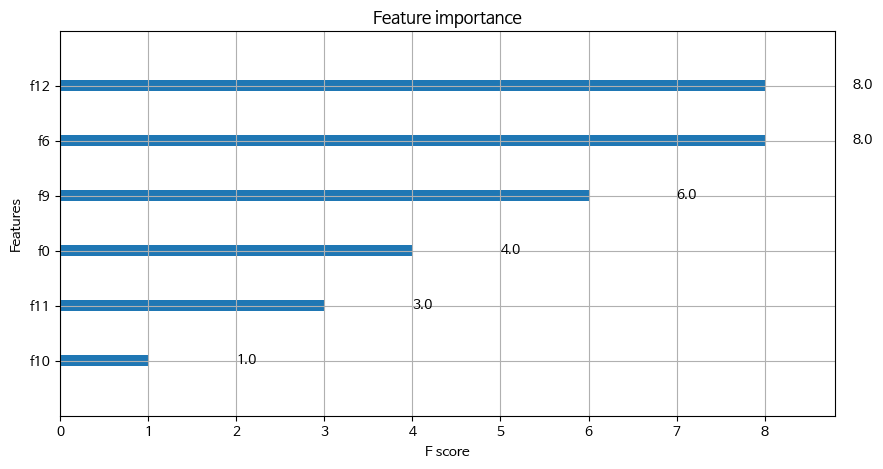

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- 어떤 특성들이 유효한지 확인할 수 있다.

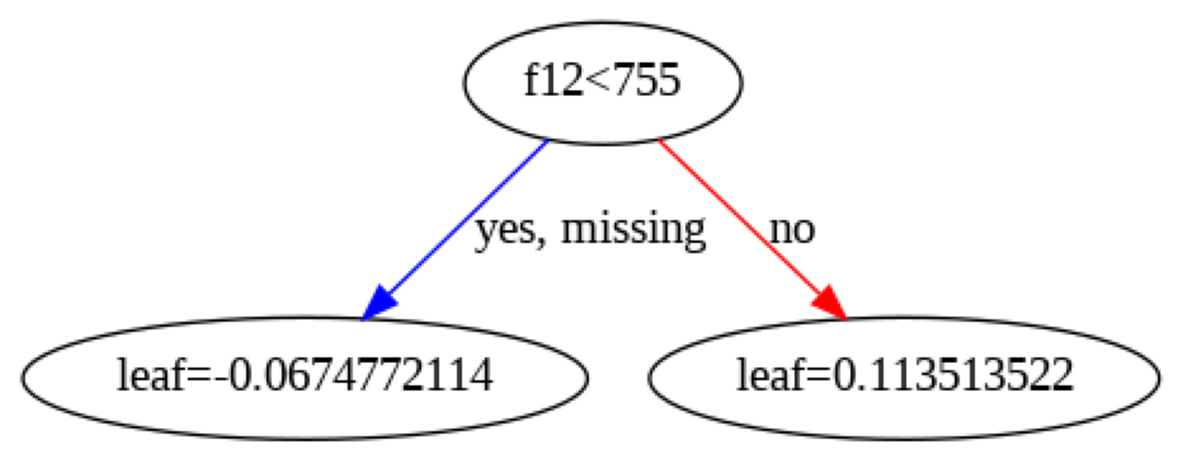

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(xgb_model, ax=ax)
plt.show()